In [1]:
import os
os.chdir('../..')

In [2]:
import numpy as np
import torch

from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

from molexplain.utils import MODELS_PATH, PROCESSED_DATA_PATH, DEVICE
from rdkit.Chem import MolFromInchi
from rdkit.Chem import MolFromSmiles
from molexplain.vis import molecule_importance

RDKit WARNING: [19:43:30] Enabling RDKit 2019.09.3 jupyter extensions
Using backend: pytorch


In [4]:
from molexplain.net import MPNNPredictor

model = MPNNPredictor(node_in_feats=46, edge_in_feats=10, n_tasks=5).to(DEVICE) 


model.load_state_dict(torch.load(os.path.join(MODELS_PATH, "AZ_ChEMBL_MPNN.pt"), map_location=DEVICE))
inchis = np.load(os.path.join(PROCESSED_DATA_PATH, "inchis.npy"))

In [80]:
example_inchi = inchis[96]
print(example_inchi)

InChI=1S/C24H30N4O3S/c1-16-12-14-20(15-13-16)32(30,31)27-22-21(23(29)25-18(3)24(4,5)6)17(2)26-28(22)19-10-8-7-9-11-19/h7-15,18,27H,1-6H3,(H,25,29)/t18-/m1/s1


In [81]:
mol = MolFromInchi(example_inchi)

In [84]:
svg, atom_importance, edge_importance = molecule_importance(mol, model, task=2, vis_factor=1)

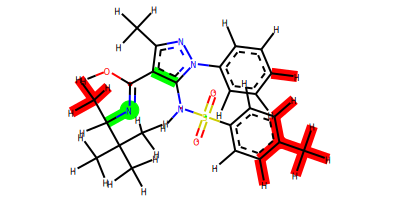

In [85]:
svg

In [51]:
atom_importance

array([ 2.58103036e-03,  2.58103036e-03,  5.55817178e-03, -8.88904091e-03,
       -9.48252995e-03, -1.15237581e-02, -1.57621633e-02, -1.40884724e-02,
       -1.58809453e-01,  5.63997637e-05,  7.36535061e-03, -2.38538743e-03,
       -1.08341062e-02, -6.27540648e-02, -1.31329671e-02, -6.79246634e-02,
       -2.65507549e-01,  4.22574282e-02, -1.11546904e-01, -1.96654387e-02,
       -3.09483893e-02, -5.26641496e-02, -3.13871264e-01,  1.71096981e-01,
       -4.49765660e-02, -6.08724244e-02, -3.57300758e-01,  1.05177119e-01,
       -3.58914405e-01, -3.68603095e-02, -1.85626686e-01, -5.15447110e-02,
       -1.76814869e-01,  6.24286175e-01, -2.55384832e-03, -2.55384832e-03,
       -2.55384832e-03, -2.55384832e-03, -2.55384832e-03, -2.55384832e-03,
       -2.54528457e-03, -2.54528457e-03, -2.54528457e-03, -2.72513437e-03,
       -6.27854886e-03, -2.65048072e-03, -2.65048072e-03, -6.27778703e-03,
       -8.80732387e-03, -8.80732387e-03, -2.54529808e-03, -2.54529808e-03,
       -2.71761161e-03, -

In [64]:
symmetric_sm = 'C1=CC=C(C=C1)C1=CC=C(C=C1)C1=CC=C(C=C1)C1=CC=CC=C1'
symmetric_mol = MolFromSmiles(symmetric_sm)

In [72]:
svg, atom_importance, edge_importance = molecule_importance(symmetric_mol, model, n_steps=50, task=1, vis_factor=1, eps=1e-4)

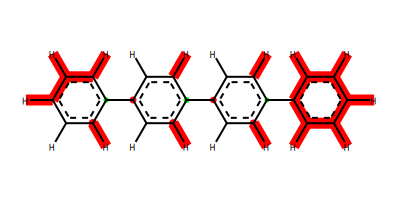

In [73]:
svg

In [74]:
atom_importance

array([-0.04054295, -0.0711408 , -0.01988108, -0.12698235, -0.06340184,
       -0.04006835,  0.11076166, -0.03879937,  0.0140349 , -0.15760058,
        0.0095505 , -0.18042967,  0.13965961, -0.03945305,  0.0184605 ,
       -0.16812631,  0.02395012, -0.1980711 ,  0.12194179, -0.0123248 ,
       -0.00606588, -0.0746772 ,  0.03680924, -0.20373595, -0.00577457,
       -0.00577477, -0.0057759 , -0.00578068, -0.00577453, -0.00469279,
       -0.00463146, -0.0057863 , -0.00577571, -0.0046928 , -0.00463146,
       -0.0057863 , -0.00577571, -0.00469273, -0.00463135, -0.00618785,
       -0.00578034, -0.0057759 ], dtype=float32)

In [75]:
edge_importance

array([-0.18598881, -0.13921465, -0.45651284, -0.19971251, -0.21225187,
       -0.4087643 ,  0.6075015 , -0.30670694, -0.4492658 , -0.11822303,
       -0.47637117, -0.39192587,  0.60495293, -0.30448157, -0.44357523,
       -0.10157894, -0.5214021 , -0.39724526,  0.55359143, -0.3409712 ,
       -0.1468053 , -0.10151259, -0.5078944 , -0.19336767, -0.06786827,
       -0.05027639, -0.05973219,  0.01669961,  0.01670038,  0.01670074,
        0.0167358 ,  0.01670008,  0.01554858,  0.01033323,  0.01673482,
        0.01670012,  0.01554859,  0.01033323,  0.01673481,  0.01670012,
        0.01554887,  0.01033402,  0.01977056,  0.01669973,  0.01670074],
      dtype=float32)